In [1]:
!pip install neattext

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 114.7/114.7 KB 11.1 MB/s eta 0:00:00


In [2]:
import pandas as pd
import numpy as np
import datetime as dt
import neattext.functions as nfx
from google.colab import drive
drive.mount('/content/drive')
import matplotlib.pyplot as plt
from textblob import TextBlob
from wordcloud import WordCloud
import re
import string

Mounted at /content/drive


In [ ]:
def bad_line(x):
    print(x)
    return None

df_data = pd.read_csv('/content/drive/Othercomputers/My Laptop (1)/year4/final_project/data_science/data_set/final_combined.csv',  on_bad_lines=bad_line, engine='python')


print(df_data.shape)
df_data.dtypes

In [150]:
import numpy as np

# Assuming your dataset is stored in a pandas DataFrame called `df`
# Split the dataframe into 5 parts
df_parts = np.array_split(df_data, 50)


df_parts[0].shape

/usr/local/lib/python3.9/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


(25499, 22)

In [151]:
df_data.shape

/usr/local/lib/python3.9/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


(25499, 22)

In [152]:

# Define a regular expression pattern that matches English letters
english_pattern = re.compile(r'[a-zA-Z]')

# Use str.contains() method to keep only rows where the 'name' column contains English letters
df_data = df_data[df_data['Tweet'].str.contains(english_pattern)]

/usr/local/lib/python3.9/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [153]:

# define a function to clean the text
def clean_text(text):
    # remove URLs
    text = re.sub(r'http\S+', '', text)
    # remove mentions (@)
    text = re.sub(r'@\w+', '', text)
    # remove hashtags (#)
    text = re.sub(r'#\w+', '', text)
    # remove punctuation
    text = text.translate(str.maketrans('', '', string.punctuation))
    # convert to lowercase
    text = text.lower()
    # remove extra spaces
    text = re.sub(r'\s+', ' ', text).strip()
    return text

/usr/local/lib/python3.9/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [154]:
df_data['clean_tweet'] = df_data['Tweet'].apply(clean_text)

/usr/local/lib/python3.9/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [155]:
#removing white spaces \n charcters

df_data['clean_tweet'] = df_data['clean_tweet'].apply(nfx.remove_multiple_spaces)

/usr/local/lib/python3.9/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [156]:
# Polarity, also known as orientation is he emotion expressed in the sentence. It can be positive,
# neagtive or neutral. Subjectivity is when text is an explanatory article which must be analysed in context.

/usr/local/lib/python3.9/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [157]:
# learn more https://textblob.readthedocs.io/en/dev/quickstart.html

#function to the subjectivity
def get_subjectivity(tweet):
  return TextBlob(tweet).sentiment.subjectivity


#function to the polarity
def get_polarity(tweet):
  return TextBlob(tweet).sentiment.polarity

/usr/local/lib/python3.9/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [158]:
#craete two colums for subjectivety and polarity
df_data['subjectivity'] = df_data['clean_tweet'].apply(get_subjectivity)

#craete two colums for subjectivety and polarity
df_data['polarity'] = df_data['clean_tweet'].apply(get_polarity)



/usr/local/lib/python3.9/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [159]:
#get the text the user felling about bit coin

def getSentiment(score):
  if (score < 0 ):
    return'negative'
  elif (score == 0):
    return 'nuteral'
  else:
    return 'positive'

/usr/local/lib/python3.9/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [160]:
df_data['sentiment'] = df_data['polarity'].apply(getSentiment)

/usr/local/lib/python3.9/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [161]:
df_data.head(5)

/usr/local/lib/python3.9/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


,Tweet,Date,time,Day of week,Cashtags,Hashtags,Language,Location,Mentioned_users,Followers,...,Average_favourite_count,account_age,Likes,Comments,Retweets,Views,clean_tweet,subjectivity,polarity,sentiment
0,@RockNRoLL_85 Apples &amp; oranges. Eddie's g...,2023-03-25 23:59:58,23:59:58,Saturday,NaN,NaN,en,False,True,220.0,...,1.559077,11.0,0.0,0.0,0.0,9.0,apples amp oranges eddies guitar riffs are the...,0.900000,0.600,positive
1,I trust Apple weather app with my life and I j...,2023-03-25 23:59:55,23:59:55,Saturday,NaN,NaN,en,True,False,168.0,...,0.177647,9.0,0.0,0.0,0.0,108.0,i trust apple weather app with my life and i j...,0.691667,0.050,positive
2,Apple AirPods Pro（第2世代） ​​​​​​​ https://t.co/0...,2023-03-25 23:59:52,23:59:52,Saturday,NaN,NaN,ja,True,True,72.0,...,0.350821,4.0,0.0,0.0,0.0,52.0,apple airpods pro（第2世代） ​​​​​​​,0.000000,0.000,nuteral
3,@CRoss714 Apple TV is getting up there with HB...,2023-03-25 23:59:49,23:59:49,Saturday,NaN,NaN,en,True,True,607.0,...,2.781585,13.0,1.0,1.0,0.0,57.0,apple tv is getting up there with hbo max with...,0.683333,0.125,positive
4,The night and darkness grows as does the stren...,2023-03-25 23:59:45,23:59:45,Saturday,NaN,NaN,en,True,False,196.0,...,7.230292,11.0,4.0,1.0,0.0,151.0,the night and darkness grows as does the stren...,0.400000,-0.300,negative


In [162]:
#lets plot
# upper_range = df_data.shape[0] * 0.1
# plt.figure(figsize=(18,10))
# for i in range(0,10000):
#   plt.scatter(df_data['polarity'][i] ,df_data['subjectivity'][i] ,color='Blue')
# plt.title('sentiment analysis')
# plt.xlabel('polarity')
# plt.ylabel('subjectivity')
# plt.show()

/usr/local/lib/python3.9/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [163]:
# df_data['sentiment'].value_counts().plot(kind ='bar')
# plt.title('sentiment analysis')
# plt.xlabel('setiment')
# plt.ylabel('no of counts')
# plt.show()

/usr/local/lib/python3.9/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [113]:
# import numpy as np

# # Assuming your dataset is stored in a pandas DataFrame called `df`
# # Split the dataframe into 5 parts
# df_parts = np.array_split(df_data, 60)

# df_parts[0].shape

/usr/local/lib/python3.9/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


(425, 26)

# topic modeling with Latent Dirichlet Allocation (LDA) 

In [114]:
pip install gensim

/usr/local/lib/python3.9/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [115]:
pip install pyLDAvis

/usr/local/lib/python3.9/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [164]:
import nltk
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer
from nltk.tokenize import word_tokenize

import gensim
from gensim import corpora
from gensim.utils import simple_preprocess
from gensim.models import CoherenceModel
from gensim.models import LdaModel

import spacy

import pyLDAvis
import pyLDAvis.gensim


nltk.download('stopwords')
nltk.download('punkt')
nltk.download('wordnet')

/usr/local/lib/python3.9/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


True

In [117]:
stopwords = stopwords.words("english")

/usr/local/lib/python3.9/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [118]:
print(stopwords)

['i', 'me', 'my', 'myself', 'we', 'our', 'ours', 'ourselves', 'you', "you're", "you've", "you'll", "you'd", 'your', 'yours', 'yourself', 'yourselves', 'he', 'him', 'his', 'himself', 'she', "she's", 'her', 'hers', 'herself', 'it', "it's", 'its', 'itself', 'they', 'them', 'their', 'theirs', 'themselves', 'what', 'which', 'who', 'whom', 'this', 'that', "that'll", 'these', 'those', 'am', 'is', 'are', 'was', 'were', 'be', 'been', 'being', 'have', 'has', 'had', 'having', 'do', 'does', 'did', 'doing', 'a', 'an', 'the', 'and', 'but', 'if', 'or', 'because', 'as', 'until', 'while', 'of', 'at', 'by', 'for', 'with', 'about', 'against', 'between', 'into', 'through', 'during', 'before', 'after', 'above', 'below', 'to', 'from', 'up', 'down', 'in', 'out', 'on', 'off', 'over', 'under', 'again', 'further', 'then', 'once', 'here', 'there', 'when', 'where', 'why', 'how', 'all', 'any', 'both', 'each', 'few', 'more', 'most', 'other', 'some', 'such', 'no', 'nor', 'not', 'only', 'own', 'same', 'so', 'than', '

/usr/local/lib/python3.9/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [165]:

# Define a function to clean the text
def clean_text(text):
    # remove URLs
    text = re.sub(r'http\S+', '', text)
    # remove mentions (@)
    text = re.sub(r'@\w+', '', text)
    # remove hashtags (#)
    text = re.sub(r'#\w+', '', text)
    # remove punctuation
    text = text.translate(str.maketrans('', '', string.punctuation))
    # convert to lowercase
    text = text.lower()
    # remove extra spaces
    text = re.sub(r'\s+', ' ', text).strip()
    return text


/usr/local/lib/python3.9/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [173]:
!python -m spacy download en_core_web_md 

/usr/local/lib/python3.9/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


2023-04-09 08:35:33.326098: W tensorflow/compiler/tf2tensorrt/utils/py_utils.cc:38] TF-TRT Warning: Could not find TensorRT
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 42.8/42.8 MB 19.5 MB/s eta 0:00:00
✔ Download and installation successful
You can now load the package via spacy.load('en_core_web_md')


In [174]:

# Apply the cleaning function to the 'Tweet' column
df_data['clean_tweet'] = df_data['Tweet'].apply(clean_text)

# Remove non-English tweets
english_pattern = re.compile(r'[a-zA-Z]')
df_data = df_data[df_data['clean_tweet'].str.contains(english_pattern)]

# Remove stopwords using the built-in stopword list from NLTK

df_data['clean_tweet'] = df_data['clean_tweet'].apply(lambda x: ' '.join([word for word in x.split() if word not in stop_words]))

# Lemmatize the text using NLTK's WordNetLemmatizer

# lemmatizer = WordNetLemmatizer()
# df_data['clean_tweet'] = df_data['clean_tweet'].apply(lambda x: ' '.join([lemmatizer.lemmatize(word) for word in x.split()]))
import spacy

nlp = spacy.load('en_core_web_md', disable=['parser', 'ner'])

def lemmatization(texts, allowed_postags =['NOUN','ADJ']):
  output =[]
  for sent in texts:
    doc = nlp(sent)
    output.append([token.lemma_ for token in doc if token.pos_ in allowed_postags ])
  return output


/usr/local/lib/python3.9/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [177]:
text_list=df_data['clean_tweet'].tolist()
print(text_list[10]) 
tokenized_data = lemmatization(text_list)
print(tokenized_data[10])

/usr/local/lib/python3.9/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


accountability transparency police officers arent overworked underpaid unwanted system needs complete overhaul you’d think “good apples” would leading charge change
['accountability', 'transparency', 'police', 'officer', 'underpaid', 'unwanted', 'system', 'complete', 'overhaul', 'good', 'apple', 'charge', 'change']


In [179]:
# Create a dictionary and corpus for the LDA model
dictionary = corpora.Dictionary(tokenized_data)
doc_term_matrix = [dictionary.doc2bow(rev) for rev in tokenized_data]



/usr/local/lib/python3.9/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [180]:
# Creating the object for LDA model using gensim library
LDA = gensim.models.ldamodel.LdaModel

# Build LDA model
lda_model = LDA(corpus=doc_term_matrix, id2word=dictionary, num_topics=10, random_state=100,
                chunksize=1000, passes=50,iterations=100)

/usr/local/lib/python3.9/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [181]:
lda_model.print_topics()

/usr/local/lib/python3.9/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


[(0,
  '0.048*"apple" + 0.037*"people" + 0.028*"cider" + 0.023*"thing" + 0.021*"woman" + 0.020*"tech" + 0.014*"many" + 0.013*"device" + 0.012*"voice" + 0.011*"watch"'),
 (1,
  '0.091*"apple" + 0.039*"bad" + 0.030*"。" + 0.019*"company" + 0.016*"good" + 0.014*"io" + 0.013*"people" + 0.011*"new" + 0.010*"play" + 0.010*"video"'),
 (2,
  '0.103*"apple" + 0.024*"tree" + 0.020*"orange" + 0.015*"user" + 0.014*"way" + 0.014*"free" + 0.011*"far" + 0.011*"game" + 0.011*"time" + 0.010*"work"'),
 (3,
  '0.224*"apple" + 0.033*"day" + 0.024*"pie" + 0.013*"pay" + 0.013*"🍎" + 0.012*"fruit" + 0.011*"news" + 0.010*"little" + 0.009*"different" + 0.007*"huge"'),
 (4,
  '0.082*"apple" + 0.062*"wifi" + 0.053*"gb" + 0.029*"mini" + 0.028*"big" + 0.022*"green" + 0.021*"stream" + 0.019*"show" + 0.018*"pro" + 0.016*"today"'),
 (5,
  '0.147*"apple" + 0.124*"music" + 0.020*"top" + 0.016*"album" + 0.016*"！" + 0.014*"spotify" + 0.012*"eye" + 0.011*"new" + 0.011*"song" + 0.010*"book"'),
 (6,
  '0.052*"apple" + 0.036*"

In [182]:
import pyLDAvis.gensim_models as gensimvis
import pyLDAvis

# Visualize the topics
vis = pyLDAvis.gensim.prepare(lda_model, doc_term_matrix, dictionary)
pyLDAvis.display(vis)

/usr/local/lib/python3.9/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [184]:

print('\nPerplexity: ', lda_model.log_perplexity(doc_term_matrix,total_docs=10000))  # a measure of how good the model is. lower the better.

# Compute Coherence Score
from gensim.models.coherencemodel import CoherenceModel
coherence_model_lda = CoherenceModel(model=lda_model, texts=tokenized_data, dictionary=dictionary , coherence='c_v')
coherence_lda = coherence_model_lda.get_coherence()
print('\nCoherence Score: ', coherence_lda)

/usr/local/lib/python3.9/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)



Perplexity:  -9.502310602190207

Coherence Score:  0.3968428398710699


In [186]:
def compute_coherence_values(dictionary, corpus, texts, limit, start=2, step=3):
  coherence_values = []
  model_list = []
  for num_topics in range(start, limit, step):
      model = gensim.models.ldamodel.LdaModel(corpus=corpus, num_topics=num_topics, id2word=dictionary)
      model_list.append(model)
      coherencemodel = CoherenceModel(model=model, texts=texts, dictionary=dictionary, coherence='c_v')
      coherence_values.append(coherencemodel.get_coherence())

  return model_list, coherence_values

/usr/local/lib/python3.9/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [187]:
model_list, coherence_values = compute_coherence_values(dictionary=dictionary, corpus=doc_term_matrix, texts=tokenized_data, start=2, limit=50, step=1)

/usr/local/lib/python3.9/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


/usr/local/lib/python3.9/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


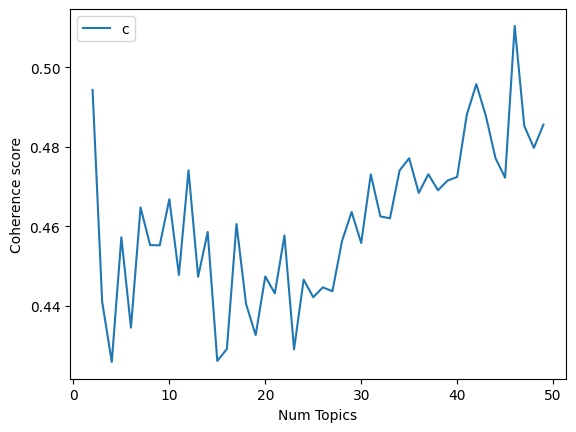

In [188]:
# Show graph
limit=50; start=2; step=1;
x = range(start, limit, step)
plt.plot(x, coherence_values)
plt.xlabel("Num Topics")
plt.ylabel("Coherence score")
plt.legend(("coherence_values"), loc='best')
plt.show()# Print the coherence scores

In [189]:
# Print the coherence scores
for m, cv in zip(x, coherence_values):
    print("Num Topics =", m, " has Coherence Value of", round(cv, 4))

Num Topics = 2  has Coherence Value of 0.4943
Num Topics = 3  has Coherence Value of 0.4411
Num Topics = 4  has Coherence Value of 0.426
Num Topics = 5  has Coherence Value of 0.4573
Num Topics = 6  has Coherence Value of 0.4346
Num Topics = 7  has Coherence Value of 0.4648
Num Topics = 8  has Coherence Value of 0.4553
Num Topics = 9  has Coherence Value of 0.4553
Num Topics = 10  has Coherence Value of 0.4668
Num Topics = 11  has Coherence Value of 0.4478
Num Topics = 12  has Coherence Value of 0.4741
Num Topics = 13  has Coherence Value of 0.4473
Num Topics = 14  has Coherence Value of 0.4586
Num Topics = 15  has Coherence Value of 0.4262
Num Topics = 16  has Coherence Value of 0.4292
Num Topics = 17  has Coherence Value of 0.4606
Num Topics = 18  has Coherence Value of 0.4405
Num Topics = 19  has Coherence Value of 0.4327
Num Topics = 20  has Coherence Value of 0.4474
Num Topics = 21  has Coherence Value of 0.4432
Num Topics = 22  has Coherence Value of 0.4577
Num Topics = 23  has C

/usr/local/lib/python3.9/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [190]:
optimal_model = model_list[44]
model_topics = optimal_model.show_topics(formatted=False)
optimal_model.print_topics(num_words=10)

/usr/local/lib/python3.9/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


[(16,
  '0.219*"apple" + 0.139*"orange" + 0.102*"watch" + 0.081*"family" + 0.069*"different" + 0.052*"banana" + 0.049*"pear" + 0.048*"datum" + 0.014*"child" + 0.010*"plant"'),
 (24,
  '0.123*"news" + 0.110*"apple" + 0.087*"type" + 0.044*"pencil" + 0.036*"name" + 0.031*"photo" + 0.031*"baby" + 0.031*"rotten" + 0.025*"local" + 0.022*"artist"'),
 (11,
  '0.099*"apple" + 0.060*"vintage" + 0.059*"auction" + 0.059*"service" + 0.055*"collection" + 0.041*"water" + 0.025*"medium" + 0.021*"drink" + 0.021*"social" + 0.020*"orchard"'),
 (1,
  '0.558*"apple" + 0.085*"✅" + 0.056*"product" + 0.033*"world" + 0.029*"guide" + 0.013*"screen" + 0.008*"radio" + 0.008*"major" + 0.007*"chief" + 0.007*"chatgpt"'),
 (12,
  '0.172*"apple" + 0.147*"eye" + 0.102*"green" + 0.023*"camera" + 0.023*"help" + 0.022*"order" + 0.021*"need" + 0.020*"piece" + 0.020*"person" + 0.020*"enough"'),
 (22,
  '0.102*"️" + 0.079*"sound" + 0.071*"comment" + 0.070*"cute" + 0.060*"apple" + 0.041*"system" + 0.032*"quality" + 0.028*"cal

In [191]:
vis = pyLDAvis.gensim.prepare(optimal_model, doc_term_matrix, dictionary)
pyLDAvis.display(vis)

/usr/local/lib/python3.9/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [146]:
#Bigrams and Trigrams
bigrams_phrases = gensim.models.Phrases(df_data['clean_tweet'],min_count=5, threshold=50)
tirgrams_phrases = gensim.models.Phrases(bigrams_phrases[df_data['clean_tweet']], threshold=50)

bigram = gensim.models.phrases.Phraser(bigrams_phrases)
trigram = gensim.models.phrases.Phraser(tirgrams_phrases)

def make_bigrams(texts):
  return(bigram[doc] for doc in texts)

def make_trigrams(texts):
  return(trigram[doc] for doc in texts)

data_bigrams = make_bigrams(df_data['clean_tweet'])
data_bigrams_trigrams = list(make_trigrams(data_bigrams))

print(data_bigrams_trigrams[0])

/usr/local/lib/python3.9/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


['a', 'p', 'p', 'l', 'e', ' ', 'a', 'm', 'p', ' ', 'o', 'r', 'a', 'n', 'g', 'e', ' ', 'e', 'd', 'd', 'y', ' ', 'g', 'u', 'i', 't', 'a', 'r', ' ', 'r', 'i', 'f', 'f', ' ', 's', 'o', 'n', 'g', ' ', 'd', 'a', 'v', 'e', 's', ' ', 'r', 'i', 'f', 'f', ' ', 's', 'e', 'r', 'v', 'e', ' ', 's', 'o', 'n', 'g', ' ', 'a', 'm', 'a', 'z', 'i', 'n', 'g', 'l', 'y']


In [121]:
# Create a dictionary and corpus for the LDA model
dictionary = corpora.Dictionary(df_data['clean_tweet'].apply(lambda x: x.split()))
corpus = [dictionary.doc2bow(text.split()) for text in df_data['clean_tweet']]

/usr/local/lib/python3.9/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [122]:
df_data.shape

/usr/local/lib/python3.9/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


(24078, 26)

In [123]:
print(corpus[0][0:20])
word = dictionary[[0][:1][0]]
print(word)

[(0, 1), (1, 1), (2, 1), (3, 1), (4, 1), (5, 1), (6, 1), (7, 2), (8, 1), (9, 2)]
amazingly


/usr/local/lib/python3.9/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [124]:
lda_model = LdaModel(corpus=corpus, id2word=dictionary, num_topics=30,random_state = 100,update_every = 1, chunksize= 100, passes=10, alpha='auto')

/usr/local/lib/python3.9/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [127]:
import pyLDAvis.gensim_models as gensimvis
import pyLDAvis

# Visualize the topics
vis = gensimvis.prepare(lda_model, corpus, dictionary, mds='mmds', R=30)
pyLDAvis.display(vis)

/usr/local/lib/python3.9/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [129]:
# Get the topic with the highest probability for each tweet
topics = [max(lda_model[doc], key=lambda x: x[1])[0] for doc in corpus]

# Add the topics to the dataframe
df_data['Topic'] = topics

/usr/local/lib/python3.9/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [130]:
df_data.head()

/usr/local/lib/python3.9/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


,Tweet,Date,time,Day of week,Cashtags,Hashtags,Language,Location,Mentioned_users,Followers,...,account_age,Likes,Comments,Retweets,Views,clean_tweet,subjectivity,polarity,sentiment,Topic
0,@RockNRoLL_85 Apples &amp; oranges. Eddie's g...,2023-03-25 23:59:58,23:59:58,Saturday,NaN,NaN,en,False,True,220.0,...,11.0,0.0,0.0,0.0,9.0,apple amp orange eddy guitar riff song daves r...,0.900000,0.600,positive,28
1,I trust Apple weather app with my life and I j...,2023-03-25 23:59:55,23:59:55,Saturday,NaN,NaN,en,True,False,168.0,...,9.0,0.0,0.0,0.0,108.0,trust apple weather app life realized it’s app...,0.691667,0.050,positive,23
2,Apple AirPods Pro（第2世代） ​​​​​​​ https://t.co/0...,2023-03-25 23:59:52,23:59:52,Saturday,NaN,NaN,ja,True,True,72.0,...,4.0,0.0,0.0,0.0,52.0,apple airpods pro（第2世代） ​​​​​​​,0.000000,0.000,nuteral,28
3,@CRoss714 Apple TV is getting up there with HB...,2023-03-25 23:59:49,23:59:49,Saturday,NaN,NaN,en,True,True,607.0,...,13.0,1.0,1.0,0.0,57.0,apple tv getting hbo max original content seve...,0.683333,0.125,positive,2
4,The night and darkness grows as does the stren...,2023-03-25 23:59:45,23:59:45,Saturday,NaN,NaN,en,True,False,196.0,...,11.0,4.0,1.0,0.0,151.0,night darkness grows strength howl wind around...,0.400000,-0.300,negative,25


In [131]:
# Get the topic terms for each topic
topic_terms = []
for i in range(lda_model.num_topics):
    topic_terms.append([term for term, prob in lda_model.get_topic_terms(i)])

# Map topic numbers to their corresponding terms
topic_dict = {i: topic_terms[i] for i in range(len(topic_terms))}

# Create a new column with topic terms for each tweet
df_data['Topic_terms'] = df_data['Topic'].apply(lambda x: topic_dict[x])

/usr/local/lib/python3.9/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [132]:
df_data.head()

/usr/local/lib/python3.9/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


,Tweet,Date,time,Day of week,Cashtags,Hashtags,Language,Location,Mentioned_users,Followers,...,Likes,Comments,Retweets,Views,clean_tweet,subjectivity,polarity,sentiment,Topic,Topic_terms
0,@RockNRoLL_85 Apples &amp; oranges. Eddie's g...,2023-03-25 23:59:58,23:59:58,Saturday,NaN,NaN,en,False,True,220.0,...,0.0,0.0,0.0,9.0,apple amp orange eddy guitar riff song daves r...,0.900000,0.600,positive,28,"[2, 850, 286, 852, 419, 677, 854, 676, 11, 679]"
1,I trust Apple weather app with my life and I j...,2023-03-25 23:59:55,23:59:55,Saturday,NaN,NaN,en,True,False,168.0,...,0.0,0.0,0.0,108.0,trust apple weather app life realized it’s app...,0.691667,0.050,positive,23,"[14, 577, 566, 565, 17, 567, 568, 563, 16, 19]"
2,Apple AirPods Pro（第2世代） ​​​​​​​ https://t.co/0...,2023-03-25 23:59:52,23:59:52,Saturday,NaN,NaN,ja,True,True,72.0,...,0.0,0.0,0.0,52.0,apple airpods pro（第2世代） ​​​​​​​,0.000000,0.000,nuteral,28,"[2, 850, 286, 852, 419, 677, 854, 676, 11, 679]"
3,@CRoss714 Apple TV is getting up there with HB...,2023-03-25 23:59:49,23:59:49,Saturday,NaN,NaN,en,True,True,607.0,...,1.0,1.0,0.0,57.0,apple tv getting hbo max original content seve...,0.683333,0.125,positive,2,"[37, 327, 34, 30, 31, 660, 667, 460, 670, 659]"
4,The night and darkness grows as does the stren...,2023-03-25 23:59:45,23:59:45,Saturday,NaN,NaN,en,True,False,196.0,...,4.0,1.0,0.0,151.0,night darkness grows strength howl wind around...,0.400000,-0.300,negative,25,"[50, 41, 48, 45, 47, 52, 36450, 36449, 36447, ..."


In [ ]:
import pandas as pd
import numpy as np
import re
import string
import nltk
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer
from gensim import corpora
from gensim.models import LdaModel
import warnings
warnings.filterwarnings('ignore')

# Load data
# df_data = pd.read_csv('/path/to/data.csv')

# Define a function to clean the text
def clean_text(text):
    # remove URLs
    text = re.sub(r'http\S+', '', text)
    # remove mentions (@)
    text = re.sub(r'@\w+', '', text)
    # remove hashtags (#)
    text = re.sub(r'#\w+', '', text)
    # remove punctuation
    text = text.translate(str.maketrans('', '', string.punctuation))
    # convert to lowercase
    text = text.lower()
    # remove extra spaces
    text = re.sub(r'\s+', ' ', text).strip()
    return text

# Apply the cleaning function to the 'Tweet' column
df_parts[0]['clean_tweet'] = df_parts[0]['Tweet'].apply(clean_text)

# Remove non-English tweets
english_pattern = re.compile(r'[a-zA-Z]')
df_parts[0] = df_parts[0][df_parts[0]['clean_tweet'].str.contains(english_pattern)]

# Remove stopwords using the built-in stopword list from NLTK
nltk.download('stopwords')
stop_words = stopwords.words('english')
df_parts[0]['clean_tweet'] = df_parts[0]['clean_tweet'].apply(lambda x: ' '.join([word for word in x.split() if word not in stop_words]))

# Lemmatize the text using NLTK's WordNetLemmatizer
nltk.download('wordnet')
lemmatizer = WordNetLemmatizer()
df_parts[0]['clean_tweet'] = df_parts[0]['clean_tweet'].apply(lambda x: ' '.join([lemmatizer.lemmatize(word) for word in x.split()]))

# Create a dictionary and corpus for the LDA model
dictionary = corpora.Dictionary(df_parts[0]['clean_tweet'].apply(lambda x: x.split()))
corpus = [dictionary.doc2bow(text.split()) for text in df_parts[0]['clean_tweet']]

# Train an LDA model
num_topics = 5
lda_model = LdaModel(corpus=corpus, id2word=dictionary, num_topics=num_topics, passes=10, alpha='auto')

# Print the topics and their top 10 words
for topic in lda_model.print_topics():
    print(topic)


In [ ]:
import nltk
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer
from nltk.tokenize import word_tokenize

nltk.download('stopwords')
nltk.download('punkt')
nltk.download('wordnet')

stop_words = set(stopwords.words('english'))
lemmatizer = WordNetLemmatizer()

##Preprocess the text data by tokenizing, removing stop words, and stemming/lemmatizing.

In [ ]:

def preprocess_text(text):
    # Tokenize the text
    tokens = word_tokenize(text.lower())
    
    # Remove stop words
    tokens = [token for token in tokens if token not in stop_words]
    
    # Lemmatize the tokens
    tokens = [lemmatizer.lemmatize(token) for token in tokens]
    
    return tokens

##Convert the preprocessed text data into a document-term matrix using the Bag-of-Words model.

In [ ]:
from gensim import corpora

# Convert the preprocessed text data into a dictionary
dictionary = corpora.Dictionary(preprocess_text(tweet) for tweet in df_parts[0]['clean_tweet'])

# Convert the dictionary into a document-term matrix
corpus = [dictionary.doc2bow(preprocess_text(tweet)) for tweet in df_parts[0]['clean_tweet']]


##Train an LDA model on the document-term matrix.

In [ ]:
from gensim.models import LdaModel

# Train an LDA model on the document-term matrix
lda_model = LdaModel(corpus=corpus, num_topics=10, id2word=dictionary, passes=10)


# Split corpus and dictionary into 5 parts
# corpus_parts = np.array_split(corpus, 5)
# dictionary_parts = np.array_split(dictionary, 5)

# corpus_parts_list = np.array_split(corpus, 5)
# dictionary_parts_list = np.array_split(dictionary, 5)
# # Train LDA model on each part separately
# for i in range(5):
#     lda_model = LdaModel(corpus=corpus_parts[i], num_topics=10, id2word=dictionary_parts[i], passes=10)
#     # Do something with the trained model

In [ ]:
# Get the topic with the highest probability for each tweet
topics = [max(lda_model[doc], key=lambda x: x[1])[0] for doc in corpus]

# Add the topics to the dataframe
df_parts[0]['Topic'] = topics

In [ ]:
df_parts[0].head()

In [ ]:
# Get the topic terms for each topic
topic_terms = []
for i in range(lda_model.num_topics):
    topic_terms.append([term for term, prob in lda_model.get_topic_terms(i)])

# Map topic numbers to their corresponding terms
topic_dict = {i: topic_terms[i] for i in range(len(topic_terms))}

# Create a new column with topic terms for each tweet
df_parts[0]['Topic_terms'] = df_parts[0]['Topic'].apply(lambda x: topic_dict[x])

In [ ]:
df_parts[0].head()

In [ ]:
# Assuming `df` is your DataFrame with the LDA topics in the `Topic` column

# Load the trained LDA model
lda_model = lda_model

# Define a function to convert topic_terms to words
def get_topic_words(topic_terms):
    return [lda_model.id2word[id] for id, _ in topic_terms]

# Apply the function to the `Topic` column to get the topic words
df_parts[0]['Topic_words'] = df_parts[0]['Topic'].apply(get_topic_words)

In [ ]:
df_parts[0].head()

## keyword extraction from the Tweet column and store all the keywords as a list in a new column

In [ ]:
# define function to extract keywords
def extract_keywords(text):
    # tokenize text into words
    tokens = word_tokenize(text.lower())
    # remove stopwords
    stop_words = set(stopwords.words('english'))
    keywords = [word for word in tokens if word.isalpha() and word not in stop_words]
    return keywords

In [ ]:
# apply function to the Tweet column and store result in a new column called Keywords
df_data['Keywords'] = df_data['Tweet'].apply(extract_keywords)